(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
   CHAS     RM   AGE  RAD  MEDV
0   0.0  6.575  65.2    1  24.0
1   0.0  6.421  78.9    2  21.6
2   0.0  7.185  61.1    2  34.7
3   0.0  6.998  45.8    3  33.4
4   0.0  7.147  54.2    3  36.2


         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  486.00  486.00  486.00  486.00  506.00  506.00  486.00  506.00  506.00   
mean     3.61   11.21   11.08    0.07    0.55    6.28   68.52    3.80    9.55   
std      8.72   23.39    6.84    0.26    0.12    0.70   28.00    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.18    2.10    4.00   
50%      0.25    0.00    9.69    0.00    0.54    6.21   76.80    3.21    5.00   
75%      3.56   12.50   18.10    0.00    0.62    6.62   93.98    5.19   24.00   
max   

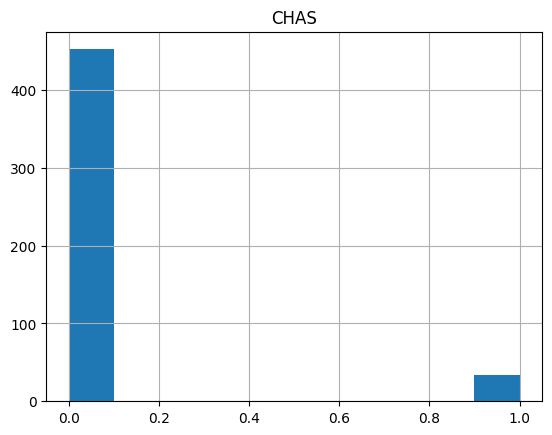

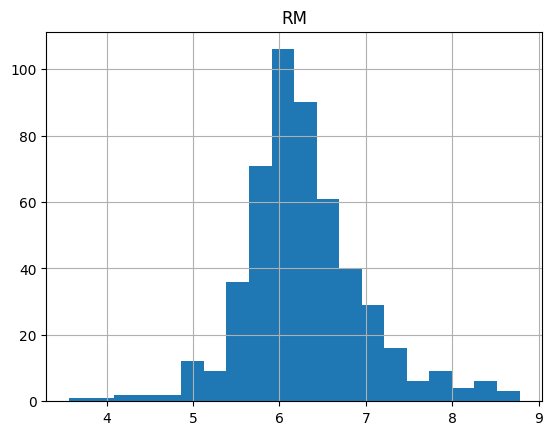

In [1]:
""" 
Machine Learning in Python involves 4 step
1. Import 
2, Instantiate
3. Fit
4. Predict

Some info about Boston Dataset - Some Ethical Issues with it
:Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

"""
# Exploratory Data Analysis - Get used to data, know it
import pandas as pd
import matplotlib.pyplot as plt
from datasets.rohirto_datasets import load_boston_data
## build a DataFrame
boston = load_boston_data()

# See the shape and columns
print(boston.shape)
print(boston.columns)



# Quick Testing
print(boston[['CHAS', 'RM', 'AGE', 'RAD', 'MEDV']].head())
print("\n")
print(boston.describe().round(2)) # Sumary statistics

# Visualize the data 
boston.hist(column='CHAS') # Eithr river side or not
plt.savefig("plots/plot1.png")
plt.show()


boston.hist(column='RM', bins=20) # No of Rooms
plt.savefig("plots/plot2.png")
plt.show()

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.19   0.40 -0.05  0.42 -0.22  0.35 -0.37  0.62  0.58     0.28   
ZN      -0.19  1.00  -0.53 -0.04 -0.51  0.32 -0.56  0.66 -0.31 -0.31    -0.41   
INDUS    0.40 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.73     0.39   
CHAS    -0.05 -0.04   0.06  1.00  0.08  0.10  0.08 -0.09  0.00 -0.03    -0.11   
NOX      0.42 -0.51   0.76  0.08  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.32  -0.39  0.10 -0.30  1.00 -0.25  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.56   0.64  0.08  0.73 -0.25  1.00 -0.74  0.46  0.51     0.27   
DIS     -0.37  0.66  -0.71 -0.09 -0.77  0.21 -0.74  1.00 -0.49 -0.53    -0.23   
RAD      0.62 -0.31   0.60  0.00  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.73 -0.03  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.28 -0.41   0.39 -0.11  0.19 -0.36  0.27 -0.23  0.46  0.46     1.00   
B       -0.38  0.17  -0.36  

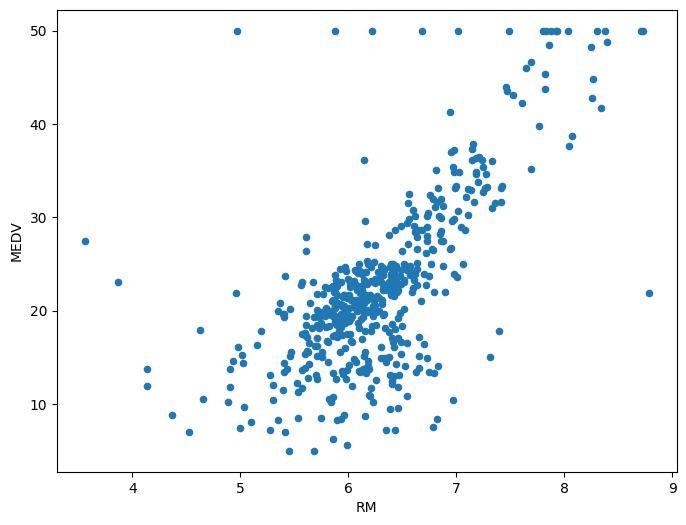

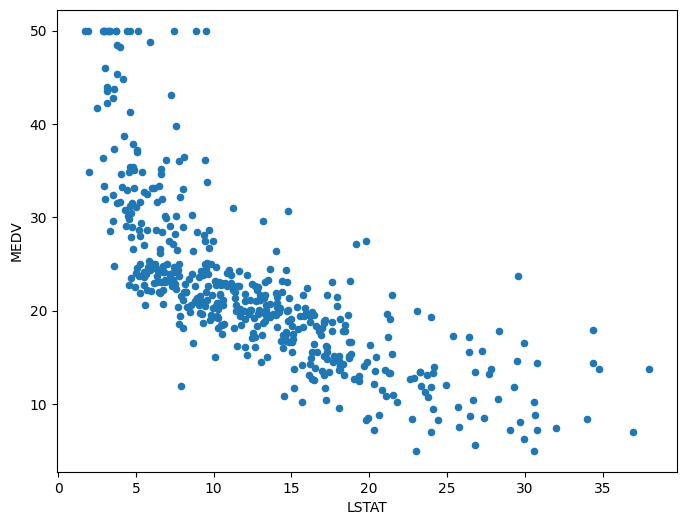

In [2]:
""" Correlation Matrix """

corr_matrix = boston.corr().round(2)
print(corr_matrix)

# Data preparation - Features selection - using 'RM' and 'LSTAT'
boston.plot(kind = 'scatter',
  x = 'RM',
  y = 'MEDV',
  figsize=(8,6))
plt.savefig("plots/plot4.png")
plt.show()

boston.plot(kind = 'scatter',
  x = 'LSTAT',
  y = 'MEDV',
  figsize=(8,6))
plt.savefig("plots/plot5.png")
plt.show()

In [3]:
""" Feature Selection """
# RM Appears to be better suited for Task
# hus we start with a univariate linear regression: MEDV = b + m * RM.
# In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array (Y).

X = boston[['RM']] # 2D array Conversion - feature
print(X.shape)

Y = boston['MEDV'] #1D array - target
print(Y.shape) # (506, )

(506, 1)
(506,)


In [7]:
""" Fitting a Univariate Linear Regression """

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
print(model)

# we split the data into training and testing sets - 70% and 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
  test_size = 0.3, 
  random_state=1)

# See their Dimensions 
print(X_train.shape) # 70%
print(Y_train.shape)
print(X_test.shape) # 30%
print(Y_test.shape)

model.fit(X_train, Y_train)
print(model.intercept_.round(2)) # Print the intercept
print(model.coef_.round(2)) # print the slope, it will be list, for multivariate regression


LinearRegression()
(354, 1)
(354,)
(152, 1)
(152,)
-30.57
[8.46]


In [11]:
""" Prediction based on the Model we've just built """
import numpy as np
new_RM = np.array([6.5]).reshape(-1,1) # make sure it's 2d
print(model.predict(new_RM))

# Above function does below math op
print(model.intercept_ + model.coef_*6.5)

# Do the predictions on Test set
y_test_predicted = model.predict(X_test)
print(y_test_predicted.shape)
print(type(y_test_predicted))

[24.42606323]
[24.42606323]
(152,)
<class 'numpy.ndarray'>


/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


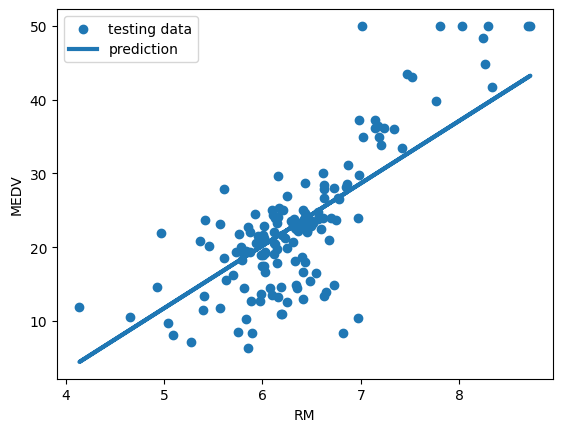

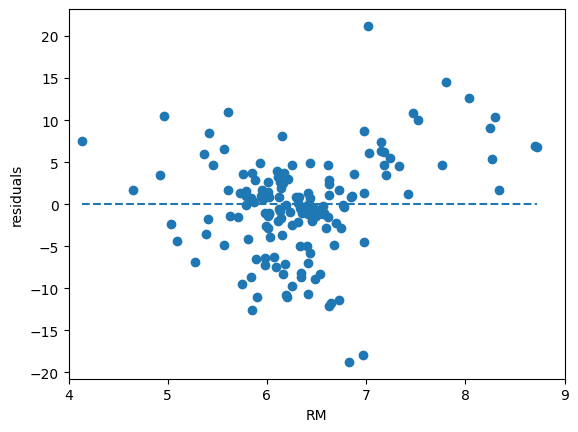

36.517214730838624

In [14]:
""" Evaluating the model """
# Using Visualizations to see that
plt.scatter(X_test, Y_test,
label='testing data');
plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

# Visualizing Residuals on 1D 
residuals = Y_test - y_test_predicted
# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0, 
  xmin = X_test.min(), xmax=X_test.max(),
  linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.show()

# Thus residuals give us an idea of how good our model fits to test data
# A mean value of residuals will not give correct idea as it can be +ve and -ve
# thus go for mean squared error, r score etc
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, y_test_predicted))
# n general, the smaller the MSE, the better, yet there is no absolute good or bad threshold.
# We can define it based on the dependent variable, i.e., MEDV in the test set. Y_test ranges from
# 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

# R score
#It is the proportion of total variation explained by the model. Here, around 60% of variability
# in the testing data is explained by our model
# A perfect model explains all the variation in the data. Note R-squared is between 0 and 100%:
# 0% indicates that the model explains none of the variability of the response data around its mean
# while 100% indicates that the model explains all of it.

print(model.score(X_test, Y_test))
